In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt 
from sklearn.manifold import TSNE

First let's set up our Bitcoin Heist dataframe and see what's in it.

In [2]:

csv_path='final_proj/BitcoinHeistData.csv'
bch = pd.read_csv(csv_path)
print(bch.shape)
bch.head()

(2916697, 10)


address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income            label  
0       0          2  100050000.0  princetonCerber  
1       0          1  100000000.0   princetonLocky  
2       0          2  200000000.0  princetonCerber  
3       0          2   71200000.0  princetonCerber  
4       0          1  200000000.0   princetonLocky

OK so we're working with a set of almost 3 million transactions. In addition to the obvious columns, we have the features of our transactions: length, weight, count, looped, neighbors and income.
I want to get a sense of the labels column.

In [3]:

labels = bch['label']
label_list = []
for x in labels:
    if x not in label_list:
            label_list.append(x)

print(len(labels))
print(len(label_list))
label_list

2916697
29


['princetonCerber',
 'princetonLocky',
 'montrealCryptoLocker',
 'montrealCryptXXX',
 'paduaCryptoWall',
 'montrealWannaCry',
 'montrealDMALockerv3',
 'montrealCryptoTorLocker2015',
 'montrealSamSam',
 'montrealFlyper',
 'montrealNoobCrypt',
 'montrealDMALocker',
 'montrealGlobe',
 'montrealEDA2',
 'paduaKeRanger',
 'montrealVenusLocker',
 'montrealXTPLocker',
 'paduaJigsaw',
 'montrealGlobev3',
 'montrealJigSaw',
 'montrealXLockerv5.0',
 'montrealXLocker',
 'montrealRazy',
 'montrealCryptConsole',
 'montrealGlobeImposter',
 'montrealSam',
 'montrealComradeCircle',
 'montrealAPT',
 'white']

Ok so we have 29 unique labels, which are named after the study that the addresses were discovered by, followed by the name of the group. We need to keep in mind that white just means not known to be ransomware. There are certainly ransomware addresses in that group as well but not that we know of. Next let's do some vizualization of the comparison between the ransomware addresses and the white addreses. To do this I'll group the ransomware addresses into a group called black.

In [4]:

white = bch.loc[bch['label']=='white']
black = bch.loc[bch['label']!='white']
print(white.shape)
print(black.shape)
print(black.head())
print(white.head())


(2875284, 10)
(41413, 10)
                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income            label  
0       0          2  100050000.0  princetonCerber  
1       0          1  100000000.0   princetonLocky  
2       0          2  200000000.0  princetonCerber  
3       0          2   71200000.0  princetonCerber  
4       0          1  200000000.0   princetonLocky  
                                  address  year  day  length  weight  count  \
41413  19snqSYnDSC4mDbv3pJuYgYqm5ctqwAxnm  2011    1       0     1.0      1   
41414  1FeGY25MSKtnwVNGrnbwLsecBpBY

Now lets do some comparative analysis of the ransomware addresses against the "normal" ones. To do this first I need to reorganize the black and white groups and only keep the columns I need for this analysis.

In [5]:

black_df = black[['weight','length','count','looped']].copy()
black_df['label'] = pd.Series(['black' for x in range(len(black_df.index))])
white_df = white[['weight','length','count','looped','label']].copy()
white_black = pd.concat([black_df, white_df],                  
                      ignore_index = True,
                      sort = False)
print(white_df.shape)
print(black_df.shape)
print(white_black.shape)

(2875284, 5)
(41413, 5)
(2916697, 5)


Lets see what happens when we do a scatterplot mattrix with the full dataset of white and black addresses:

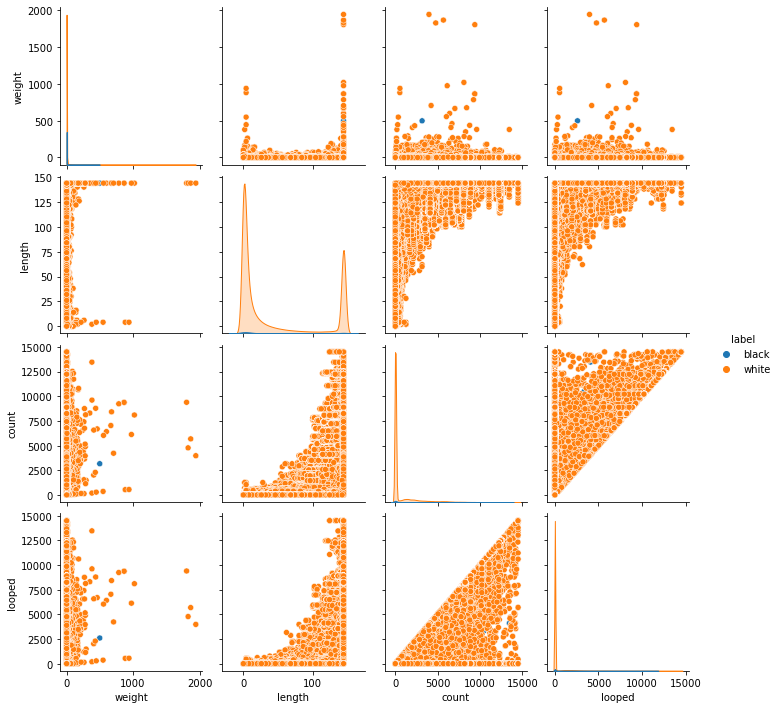

In [29]:
sns.pairplot(white_black, hue='label')

OK well that doesn't really tell me much, we just have way too much white to really see anything about the black addresses. Maybe we can try doing KDE:

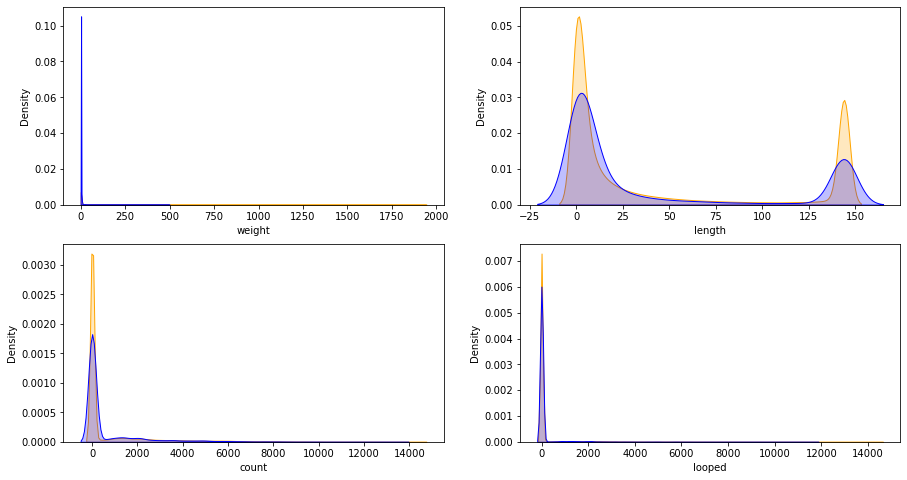

In [159]:


col_names = ['weight','length','count','looped']
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

for i, N in enumerate(col_names, 1):
    plt.subplot(2,2,i)
    w = white_df[N]
    b = black_df[N]
    sns.kdeplot(w, legend=True,  color='Orange', shade=True)
    sns.kdeplot(b, legend=True,  color='Blue', shade=True)


Some of the data is really hard to see because there's so much at the low end. We see some difference in the spikes for length and count but a similar pattern. We need to keep in mind that the N for white is much bigger than the n for black. Lets do boxplots along each dimmension:

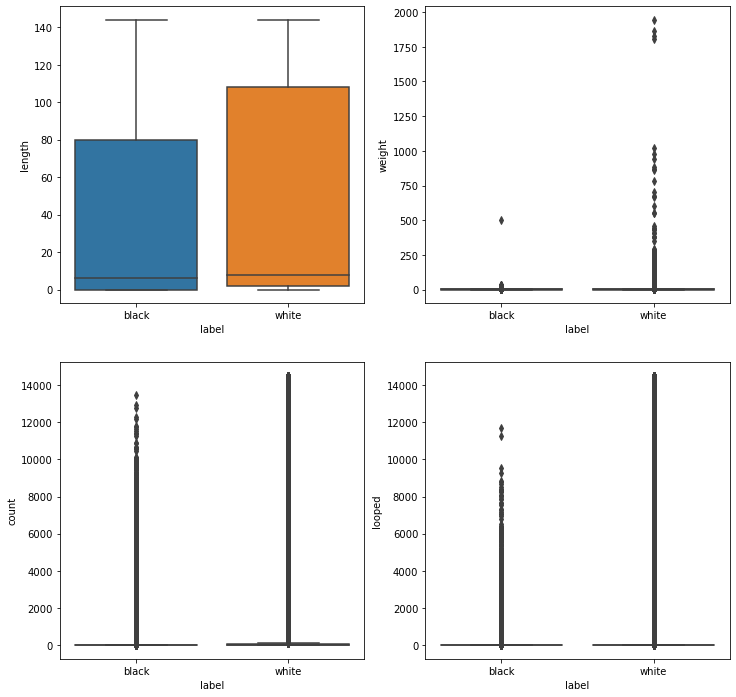

In [49]:

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 12)
sns.boxplot(data=white_black, x="label", y="length", ax=axes[0,0])
sns.boxplot(data=white_black, x="label", y="weight",ax=axes[0,1])
sns.boxplot(data=white_black, x="label", y="count", ax=axes[1,0])
sns.boxplot(data=white_black, x="label", y="looped", ax=axes[1,1])
plt.show()

Again we can't see much about about a lot of the data because of the very low mean. Interesting that the length is different here though. Since we know that white is much larger set than black let's try doing equal size random samples just ot try to understand whether the volume of data makes a difference.

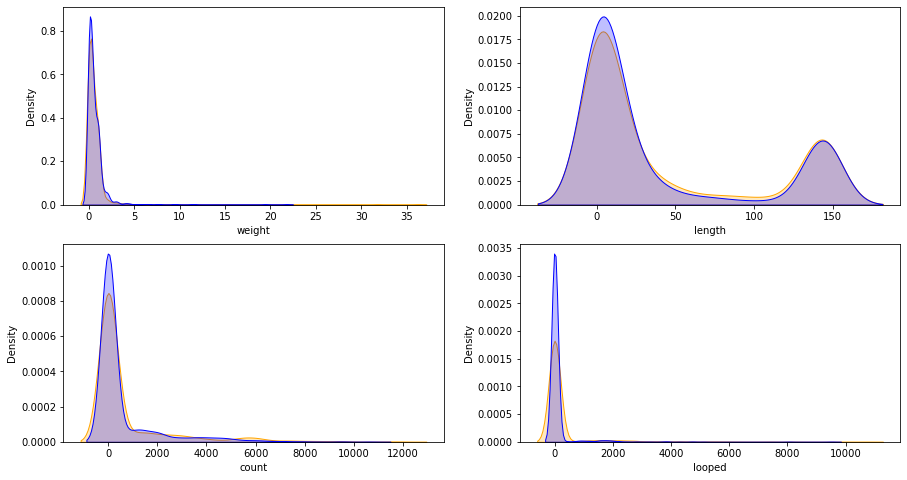

In [151]:

white_sample = white_df.sample(2000)
black_sample = black_df.sample(2000)
col_names = ['weight','length','count','looped']
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

for i, N in enumerate(col_names, 1):
    plt.subplot(2,2,i)
    w = white_sample[N]
    b = black_sample[N]
    sns.kdeplot(w, legend=True,  color='Orange', shade=True)
    sns.kdeplot(b, legend=True,  color='Blue', shade=True)


OK it does seem that equalizing the N for each group balances out the data more and we see very similar distributions. We do see some higher spikes for black addresses at the low end of the distribution. Also after running it a few  times it seems that these low end spikes persist through many smaples. Our sample size should be large enough that we can expect it to be representative with a resonably small error. Let's try a boxplot with equal size samples.

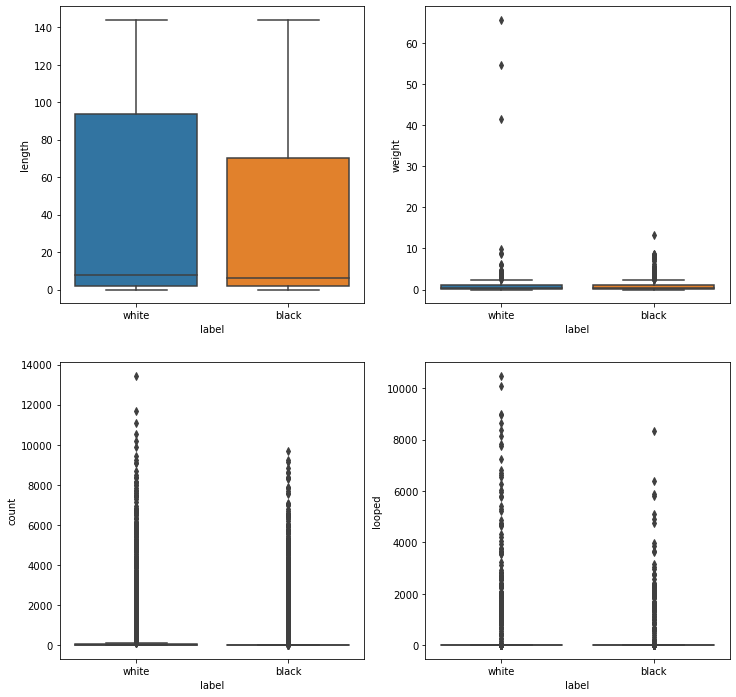

In [158]:

w_sam = white_black[white_black['label']=='white'].sample(2000)
b_sam = white_black[white_black['label']=='black'].sample(2000)
wb_sample = [w_sam, b_sam]
wb_sample = pd.concat(wb_sample)
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 12)
sns.boxplot(data=wb_sample, x="label", y="length", ax=axes[0,0])
sns.boxplot(data=wb_sample, x="label", y="weight",ax=axes[0,1])
sns.boxplot(data=wb_sample, x="label", y="count", ax=axes[1,0])
sns.boxplot(data=wb_sample, x="label", y="looped", ax=axes[1,1])
plt.show()

With the boxplots I'm seeing a pretty consistent wider distriution for length on the white addresses despite a similar mean, but the other dimensions are hard to make any statement about. Let's try looking at a histogram of each dimension for each address type.

In [167]:
from altair import Bin

base = alt.Chart().mark_bar().encode(
    alt.X("count:Q",  bin=Bin(nice=True)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)
chart = alt.vconcat(data=white.sample(2000))
row = alt.hconcat()
for i in ['length', 'weight', 'count', 'looped']:
    row |= base.encode(x=alt.X(i, bin=Bin(maxbins=20)), y='count()'
).properties(
    title={
      "text": ["Ransomware Addresses"]})
chart &= row


chart2 = alt.vconcat(data=black.sample(2000))
row2 = alt.hconcat()
for i in ['length', 'weight', 'count', 'looped']:
    row2 |= base.encode(x=alt.X(i, bin=Bin(maxbins=20)), y='count()'
).properties(
    title={
      "text": ["Ransomware Addresses"]})
chart2 &= row2

chart & chart2

alt.VConcatChart(...)

Since this data is heavily scewed to the left it seems like a log transformation may help to compare the 2 groups.

In [19]:
white_log = white.copy()
log_list = ['length','weight','count','looped']
#Making sure we don't have 0s when we do the log transform
for i in log_list:
    white_log[i] = (white_log[i])+1
for i in log_list:
    white_log[i] = np.log(white_log[i])

black_log = black.copy()
for i in log_list:
    black_log[i] = (black_log[i])+1
for i in log_list:
    black_log[i] = np.log(black_log[i])
white_log.head()

address  year  day  length    weight  \
41413  19snqSYnDSC4mDbv3pJuYgYqm5ctqwAxnm  2011    1     0.0  0.693147   
41414  1FeGY25MSKtnwVNGrnbwLsecBpBYrMQ6Kx  2011    1     0.0  0.693147   
41415  1A1nkBK7tfnVRtVbyiirEWRcayQtSTBCsW  2011    1     0.0  0.693147   
41416  18wHa1PLzoU4ToemBZn2czZbVEbyZJ2gSi  2011    1     0.0  0.693147   
41417  188sYyuK756uEsq5LTk9tiXyJHeEjxKT5c  2011    1     0.0  0.693147   

          count  looped  neighbors        income  label  
41413  0.693147     0.0          1  5.000000e+09  white  
41414  0.693147     0.0          2  5.000000e+09  white  
41415  0.693147     0.0          2  9.150000e+08  white  
41416  0.693147     0.0          2  3.402500e+10  white  
41417  0.693147     0.0          2  1.275100e+10  white

Now to try the histogram again with log scale data.

In [170]:
from altair import Bin
base = alt.Chart().mark_bar().encode(
    alt.X("count:Q",  bin=Bin(nice=True)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)
chart = alt.vconcat(data=black_log.sample(2000))
row = alt.hconcat()
scale=alt.Scale(type="log")
for i in ['length', 'weight', 'count', 'looped']:
    row |= base.encode(x=alt.X(i, bin=Bin(maxbins=20)), y=alt.Y('count()', scale=scale)
).properties(
    title={
      "text": ["Ransomware Addresses"]}
    )
    
chart &= row

chart2 = alt.vconcat(data=white_log.sample(2000))
row2 = alt.hconcat()
scale=alt.Scale(type="log")
for i in ['length', 'weight','count', 'looped']:
    row2 |= base.encode(x=alt.X(i, bin=Bin(maxbins=20)), y=alt.Y('count()', scale=scale)
).properties(
    title={
        "text": ["Unknown Addresses"]}
    )
chart2 &= row2

chart & chart2

alt.VConcatChart(...)

It looks like the most interesting relationship here is weight, so let's explore that a little more.

In [196]:



chart1 = alt.Chart(data=black_log.sample(2000)).mark_bar().encode(
    x=alt.X("weight:Q",  bin=Bin(nice=True, step=0.2),  scale=alt.Scale(domain=(0, 4.0))), 
    y=alt.Y('count()', scale=alt.Scale(type="log"))
).properties(
    title={
        "text": ["Ransomware Addresses"]}
)

chart2 = alt.Chart(data=white_log.sample(2000)).mark_bar().encode(
    x=alt.X("weight:Q",  bin=Bin(nice=True, step=0.2),  scale=alt.Scale(domain=(0, 4.0))),
    y=alt.Y('count()', scale=alt.Scale(type="log"))
).properties(
    title={
        "text": ["Unknown Addresses"]}
)

chart1 & chart2


alt.VConcatChart(...)

Here we can see the Ransomware addresses are looking more right skewed, showing that these values tend to be a little larger than the white addresses. Let's see if we can show this more clearly by plotting a sample of each on a jointplot.

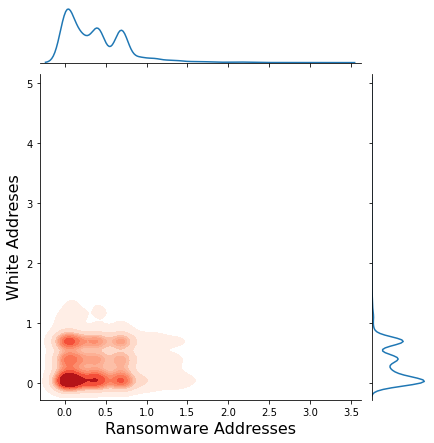

In [56]:
import random

x = []
y = []
for i in black_log['weight']:
    if i != 0:
        x.append(i)
    else:
        pass
for i in white_log['weight']:
    if i != 0:
        y.append(i)
    else:
        pass
#Need random samples so we have equal size variables
x = random.sample(x, 3000)
y = random.sample(y, 3000)
g = sns.jointplot(x = x, y = y, kind='kde', cmap="Reds", shade=True)
g.set_axis_labels('Ransomware Addresses', 'White Addreses', fontsize=16)

This seems to show a pretty consistent streching of the values on the Ransomware side to the right. We can see that there are consistent differences in the overall pattern of the data when it comes to the weight. This visualization helps us see what the relationship is. Seems that this probably is due to the fact that the weight value measures the degree of merging that is happening with the bitcoins coming together at the address from other addresses. This makes sense as it shows that the ransomware familys are converging bitcoin in the attempt to mask the transactions. Now let's use our dimmension reduction t-SNE analysis to create a scatter plot of the differences across all our quantitatitve dimmensions in a 2 dimmensional visual.

c:\Users\pvste\anaconda3\envs\dviz\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


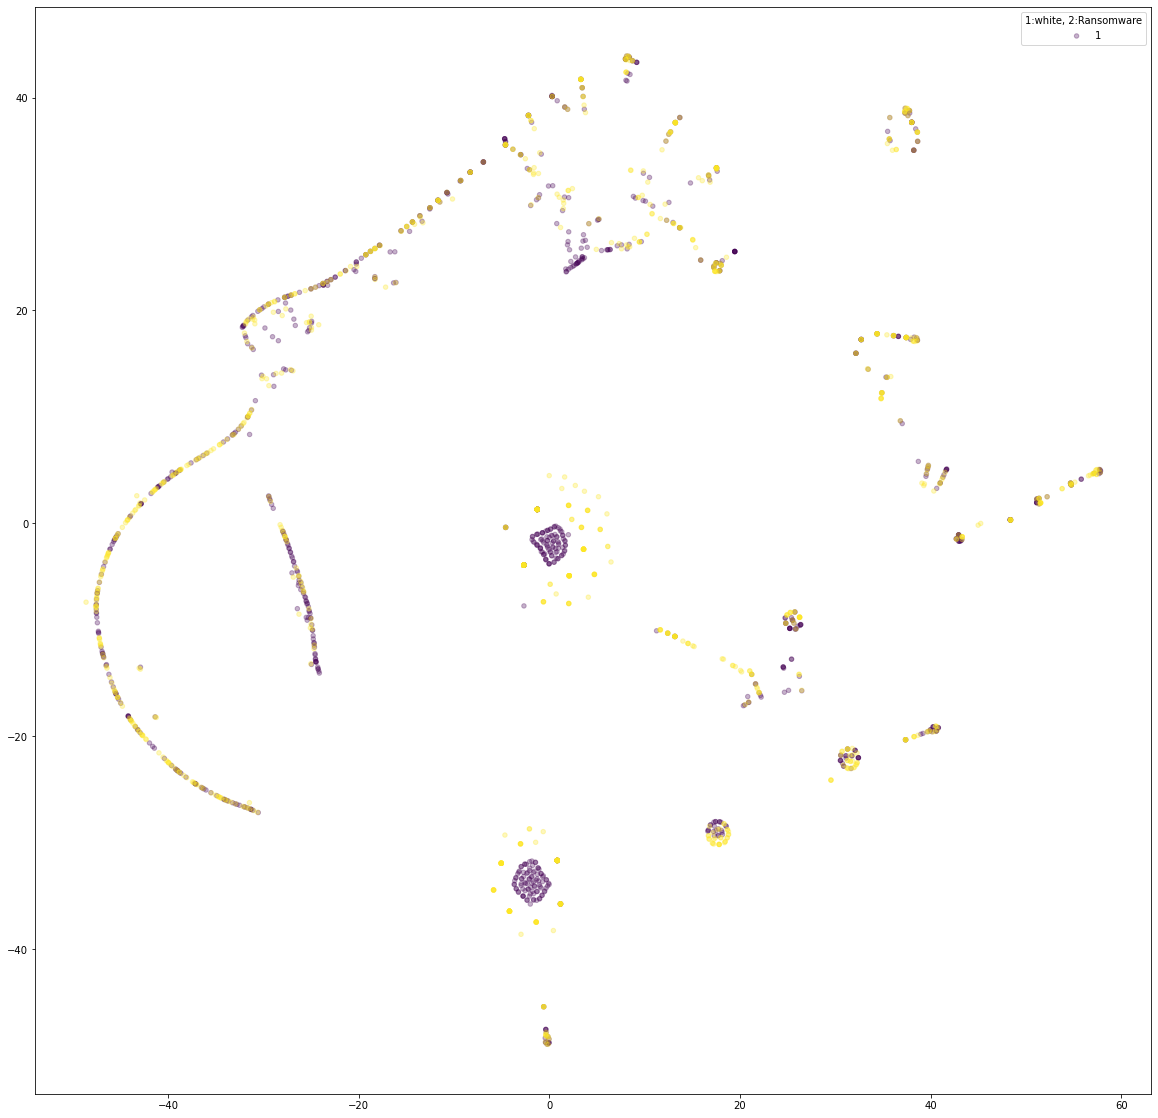

In [259]:
from sklearn.manifold import TSNE
w_sample = white_df.sample(1000)
b_sample = black_df.sample(1000)
wb_sample =  pd.concat([w_sample, b_sample],                  
                      ignore_index = True,
                      sort = False)
wb_sample['label'] = wb_sample['label'].map({'white':1, 'black':2,}, na_action=None)
wb_data = wb_sample[['length', 'weight', 'count', 'looped']].copy()
wb_labels = wb_sample['label'].tolist()
wb_labels = list(wb_labels)
d = wb_data
t = wb_labels
n_components = 2
tsne = TSNE(n_components, perplexity=30, random_state=0, learning_rate='auto')
tsne_bw_fitted = tsne.fit_transform(d)

x = tsne_bw_fitted[:,0]
y = tsne_bw_fitted[:,1]
plt.figure(figsize= (20,20))
plt.scatter(x,y, c=t, cmap='viridis', s=20, alpha=0.3, label=t)
plt.legend(t, title='1:white, 2:Ransomware')


The TSNE dimmensional reduction shows us that there are some clear differences where the model shows clustering of the data. The 2 large clusters showing white addressess surounded by a circle of black addresses demonstrates that the dimmensions are systematically different in many cases here. Also interestingly we see a few smaller clusters to right of the 2 large clusters that show mostly black addresses with a few white mixed in, these whites could be good condenders for unknown ransomware addresses. Obviously there is much similarity but the fact that it is able to find multidimmensional trends shows how this data can be of value in using machine learning to find the distinctions and apply them to unknown data to find unknown ransomware addresses.

Next let's take a look at the "Detection of Illicit account over Etherium Blockchain" dataset.

In [57]:
csv_path1='final_proj/etherium.csv'
eth = pd.read_csv(csv_path1)
print(eth.shape)
eth.head()

(4681, 50)


Index                                     Address  FLAG  \
0      1  0x0020731604c882cf7bf8c444be97d17b19ea4316     1   
1      2  0x002bf459dc58584d58886169ea0e80f3ca95ffaf     1   
2      3  0x002f0c8119c16d310342d869ca8bf6ace34d9c39     1   
3      4  0x0059b14e35dab1b4eee1e2926c7a5660da66f747     1   
4      5  0x005b9f4516f8e640bbe48136901738b323c53b00     1   

   Avg_min_between_sent_tnx  Avg_min_between_received_tnx  \
0                   1457.31                         34.12   
1                   3976.50                        834.77   
2                    112.90                         31.87   
3                   2300.37                         65.10   
4                      0.00                          0.00   

   Time_Diff_between_first_and_last_(Mins)  Sent_tnx  Received_Tnx  \
0                                  4815.43         3            13   
1                                  9622.53         2             2   
2                                   321.42         2             3   
3                                 73091.00        29            98   
4                                     0.00         0             0   

   Number_of_Created_Contracts  Unique_Received_From_Addresses  ...  \
0                            0                              10  ...   
1                            0                               1  ...   
2                            0                               3  ...   
3                            0                              89  ...   
4                            0                               0  ...   

   ERC20_min_val_sent  ERC20_max_val_sent  ERC20_avg_val_sent  \
0                 NaN                 NaN                 NaN   
1                 0.0              0.0000            0.000000   
2                 0.0              0.0000            0.000000   
3                 0.0          81324.0746         5232.816018   
4                 NaN                 NaN                 NaN   

   ERC20_min_val_sent_contract  ERC20_max_val_sent_contract  \
0                          NaN                          NaN   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          NaN                          NaN   

   ERC20_avg_val_sent_contract  ERC20_uniq_sent_token_name  \
0                          NaN                         NaN   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                        22.0   
4                          NaN                         NaN   

   ERC20_uniq_rec_token_name  ERC20_most_sent_token_type  \
0                        NaN                         NaN   
1                        1.0                               
2                        1.0                               
3                       37.0                       OCoin   
4                        NaN                         NaN   

   ERC20_most_rec_token_type  
0                        NaN  
1      Blockwell say NOTSAFU  
2      Blockwell say NOTSAFU  
3                      OCoin  
4                        NaN  

[5 rows x 50 columns]

So this set is opposite in some respects to the bitcoinheist data, this one has a smaller total N but many more dimensions. I'm going to use the features marked as the top 5 most important in the article just so that we can do a little visualization and get a sense of the data.

In [58]:
eth_top5= []
eth_top5= eth[['Address', 'FLAG', 'Time_Diff_between_first_and_last_(Mins)','total_ether_balance','min_value_received','min_val_sent','avg_val_received']].copy()
print(eth_top5.shape)
eth_top5.head()

(4681, 7)


Address  FLAG  \
0  0x0020731604c882cf7bf8c444be97d17b19ea4316     1   
1  0x002bf459dc58584d58886169ea0e80f3ca95ffaf     1   
2  0x002f0c8119c16d310342d869ca8bf6ace34d9c39     1   
3  0x0059b14e35dab1b4eee1e2926c7a5660da66f747     1   
4  0x005b9f4516f8e640bbe48136901738b323c53b00     1   

   Time_Diff_between_first_and_last_(Mins)  total_ether_balance  \
0                                  4815.43             0.001037   
1                                  9622.53             0.001092   
2                                   321.42             0.000924   
3                                 73091.00            -0.577721   
4                                     0.00             0.000000   

   min_value_received  min_val_sent  avg_val_received  
0            1.000000      1.000875          1.348445  
1            0.586269      0.585408          0.766892  
2            0.001020      0.500390          0.439607  
3            0.000784      0.000000          0.383225  
4            0.000000      0.000000          0.000000

Now let's take our top 5 feature dataframe and sperate it by flag with one df for unknonw (FLAG=1) and one for known ilicit address(FLAG=2).

In [59]:
ill_top5= eth_top5.loc[eth_top5['FLAG']==1]
nrm_top5= eth_top5.loc[eth_top5['FLAG']==0]
print(ill_top5.shape)
print(nrm_top5.shape)
print(ill_top5.head())
print(nrm_top5.head())

(2179, 7)
(2502, 7)
                                      Address  FLAG  \
0  0x0020731604c882cf7bf8c444be97d17b19ea4316     1   
1  0x002bf459dc58584d58886169ea0e80f3ca95ffaf     1   
2  0x002f0c8119c16d310342d869ca8bf6ace34d9c39     1   
3  0x0059b14e35dab1b4eee1e2926c7a5660da66f747     1   
4  0x005b9f4516f8e640bbe48136901738b323c53b00     1   

   Time_Diff_between_first_and_last_(Mins)  total_ether_balance  \
0                                  4815.43             0.001037   
1                                  9622.53             0.001092   
2                                   321.42             0.000924   
3                                 73091.00            -0.577721   
4                                     0.00             0.000000   

   min_value_received  min_val_sent  avg_val_received  
0            1.000000      1.000875          1.348445  
1            0.586269      0.585408          0.766892  
2            0.001020      0.500390          0.439607  
3            0.000784 

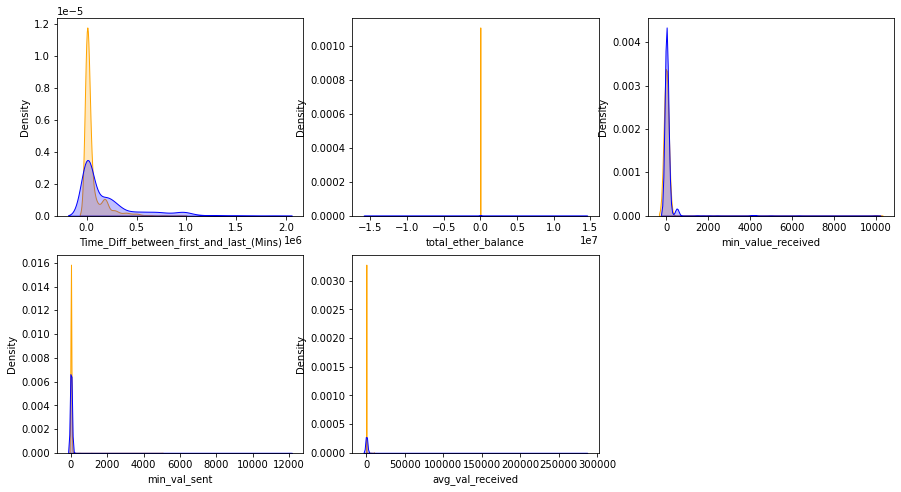

In [266]:
col_names = ['Time_Diff_between_first_and_last_(Mins)','total_ether_balance','min_value_received','min_val_sent','avg_val_received']
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

for i, N in enumerate(col_names, 1):
    plt.subplot(2,3,i)
    i = ill_top5[N]
    n = nrm_top5[N]
    sns.kdeplot(i, legend=True,  color='Orange', shade=True)
    sns.kdeplot(n, legend=True,  color='Blue', shade=True)

Similar to our previous data we have a very left skewed distribution but we can see clear differences in the distribution of illicit versus normal accounts.

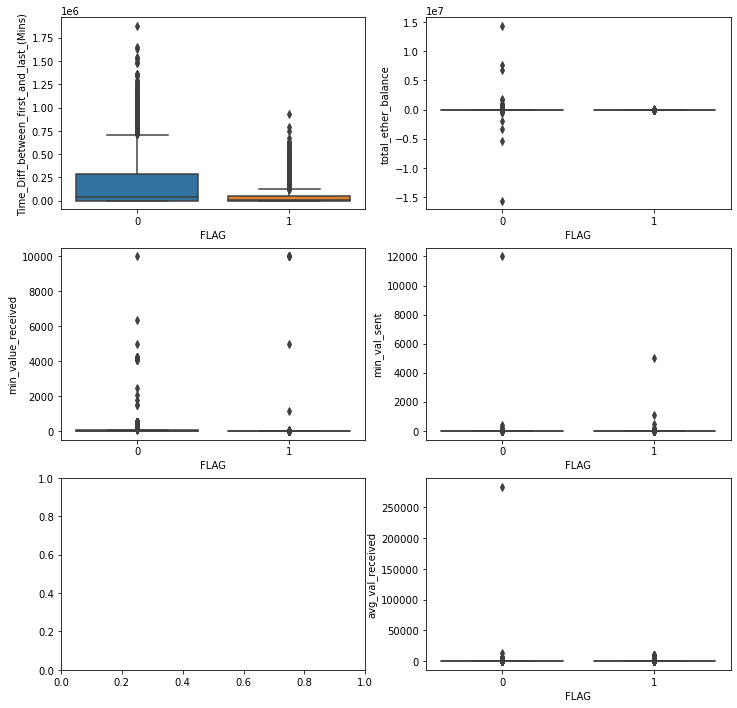

In [268]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(12, 12)
sns.boxplot(data=eth_top5, x="FLAG", y="Time_Diff_between_first_and_last_(Mins)", ax=axes[0,0])
sns.boxplot(data=eth_top5, x="FLAG", y="total_ether_balance",ax=axes[0,1])
sns.boxplot(data=eth_top5, x="FLAG", y="min_value_received", ax=axes[1,0])
sns.boxplot(data=eth_top5, x="FLAG", y="min_val_sent", ax=axes[1,1])
sns.boxplot(data=eth_top5, x="FLAG", y="avg_val_received", ax=axes[2,1])
plt.show()

In [269]:
from altair import Bin
base = alt.Chart().mark_bar().encode(
    alt.X("count:Q",  bin=Bin(nice=True)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)
chart = alt.vconcat(data=ill_top5)
row = alt.hconcat()
# scale=alt.Scale(type="log")
for i in ['Time_Diff_between_first_and_last_(Mins)','total_ether_balance','min_value_received','min_val_sent','avg_val_received']:
    row |= base.encode(x=alt.X(i, bin=Bin(maxbins=20)), y=alt.Y('count()')
).properties(
    title={
      "text": ["Illicit Addresses"]}
    )
    
chart &= row

chart2 = alt.vconcat(data=nrm_top5)
row2 = alt.hconcat()
# scale=alt.Scale(type="log")
for i in ['Time_Diff_between_first_and_last_(Mins)','total_ether_balance','min_value_received','min_val_sent','avg_val_received']:
    row2 |= base.encode(x=alt.X(i, bin=Bin(maxbins=20)), y=alt.Y('count()')
).properties(
    title={
        "text": ["Normal Addresses"]}
    )
chart2 &= row2

chart & chart2

alt.VConcatChart(...)

Again we have a pretty skewed dsitribution with most of these but still we can see why the Time Diff feature was listed as the number 1 for distinguishing the addreses. Let's try looking at the histogram with log transformed data. 

In [60]:
ill_log = ill_top5.copy()
log_list = ['Time_Diff_between_first_and_last_(Mins)','total_ether_balance','min_value_received','min_val_sent','avg_val_received']
#Making sure we don't have 0s when we do the log transform
for i in log_list:
    ill_log[i] = (ill_log[i])+1
for i in log_list:
    ill_log[i] = np.log(ill_log[i])

nrm_log = nrm_top5.copy()
for i in log_list:
    nrm_log[i] = (nrm_log[i])+1
for i in log_list:
    nrm_log[i] = np.log(nrm_log[i])

# print(ill_log.head())
# nrm_log.head()


c:\Users\pvste\.conda\envs\dviz\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [271]:
from altair import Bin
base = alt.Chart().mark_bar().encode(
    alt.X("count:Q",  bin=Bin(nice=True)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)
chart = alt.vconcat(data=ill_log)
row = alt.hconcat()
scale=alt.Scale(type="log")
for i in ['Time_Diff_between_first_and_last_(Mins)','total_ether_balance','min_value_received','min_val_sent','avg_val_received']:
    row |= base.encode(x=alt.X(i, bin=Bin(maxbins=20)), y=alt.Y('count()',scale=scale)
).properties(
    title={
      "text": ["Illicit Addresses"]}
    )
    
chart &= row

chart2 = alt.vconcat(data=nrm_log)
row2 = alt.hconcat()
scale=alt.Scale(type="log")
for i in ['Time_Diff_between_first_and_last_(Mins)','total_ether_balance','min_value_received','min_val_sent','avg_val_received']:
    row2 |= base.encode(x=alt.X(i, bin=Bin(maxbins=20)), y=alt.Y('count()',scale=scale)
).properties(
    title={
        "text": ["Normal Addresses"]}
    )
chart2 &= row2

chart & chart2

alt.VConcatChart(...)

We can see here that there are clear differences in the distribution on all these dimmensions. It's not an easy thing to pinpoint but we can see that there are a lot more time diff values less than 1 with illicit versus normal addreses, and the average value recieved histogram shows a more left skewed distribution for illicit addresses. The one that jumps out to me is the one time diff variable. Let's see if we can look at that one more closely to try to unerstand what we're seeing.

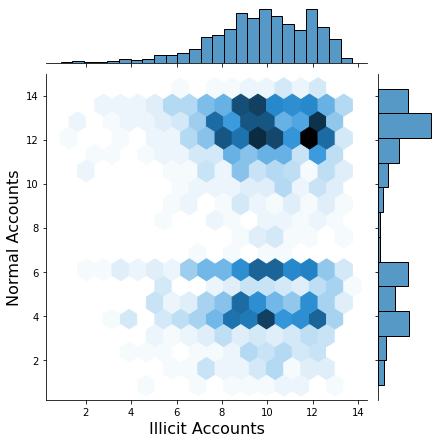

In [69]:
x2 = []
y2 = []
for i in ill_log['Time_Diff_between_first_and_last_(Mins)']:
    if i != 0:
        x2.append(i)
    else:
        pass
for i in nrm_log['Time_Diff_between_first_and_last_(Mins)']:
    if i != 0:
        y2.append(i)
    else:
        pass

x2 = random.sample(x2,1500)
y2 = random.sample(y2,1500)
g = sns.jointplot(x = x2, y = y2, kind='hex')
g.set_axis_labels('Illicit Accounts', 'Normal Accounts', fontsize=16)

This shows the difference in the bimodal distribution of normal addresses versus the more right skewed distribution in the illicit accounts. But we had to get rid of 0's to make this plot work and that's a really important feature with the illicit addresse. Let's try another visual to capture that as well.

<AxesSubplot:xlabel='Time_Diff_between_first_and_last_(Mins)', ylabel='Density'>

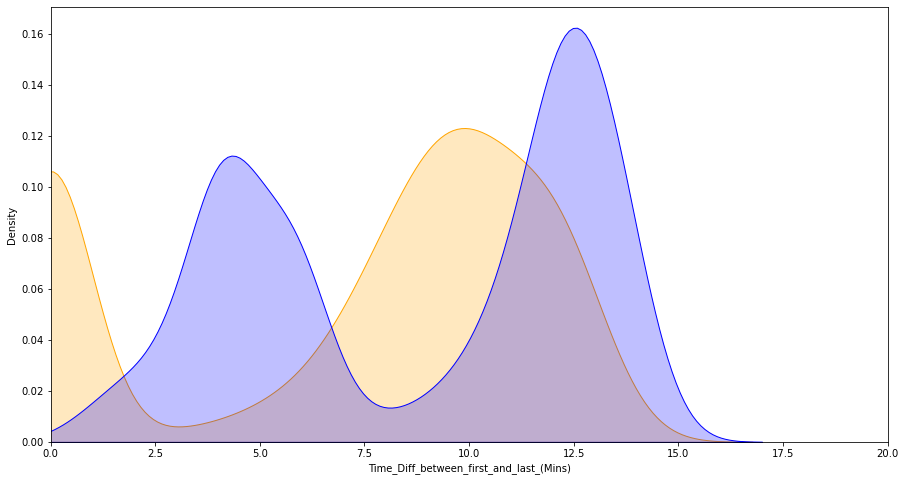

In [72]:

f = plt.figure(figsize=(15,8))
plt.xlim(0, 20)

plt.plot()
i = ill_log['Time_Diff_between_first_and_last_(Mins)']
n = nrm_log['Time_Diff_between_first_and_last_(Mins)']
sns.kdeplot(i, legend=True,  color='Orange', shade=True)
sns.kdeplot(n, legend=True,  color='Blue', shade=True)

Here we can see very clearly the differences in the distribution. In the illicit plot we see the high starting point and we compare to the values in the hexplot and that tells us that there are a lot more zeros in the time diff dimmension with the illicit than with normal. This indicates that transactions are happening fast and may be due to automated transactions. This could be something that occurs when the account holders are trying to quickly move funds around to mask where the transactions are going.

c:\Users\pvste\anaconda3\envs\dviz\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


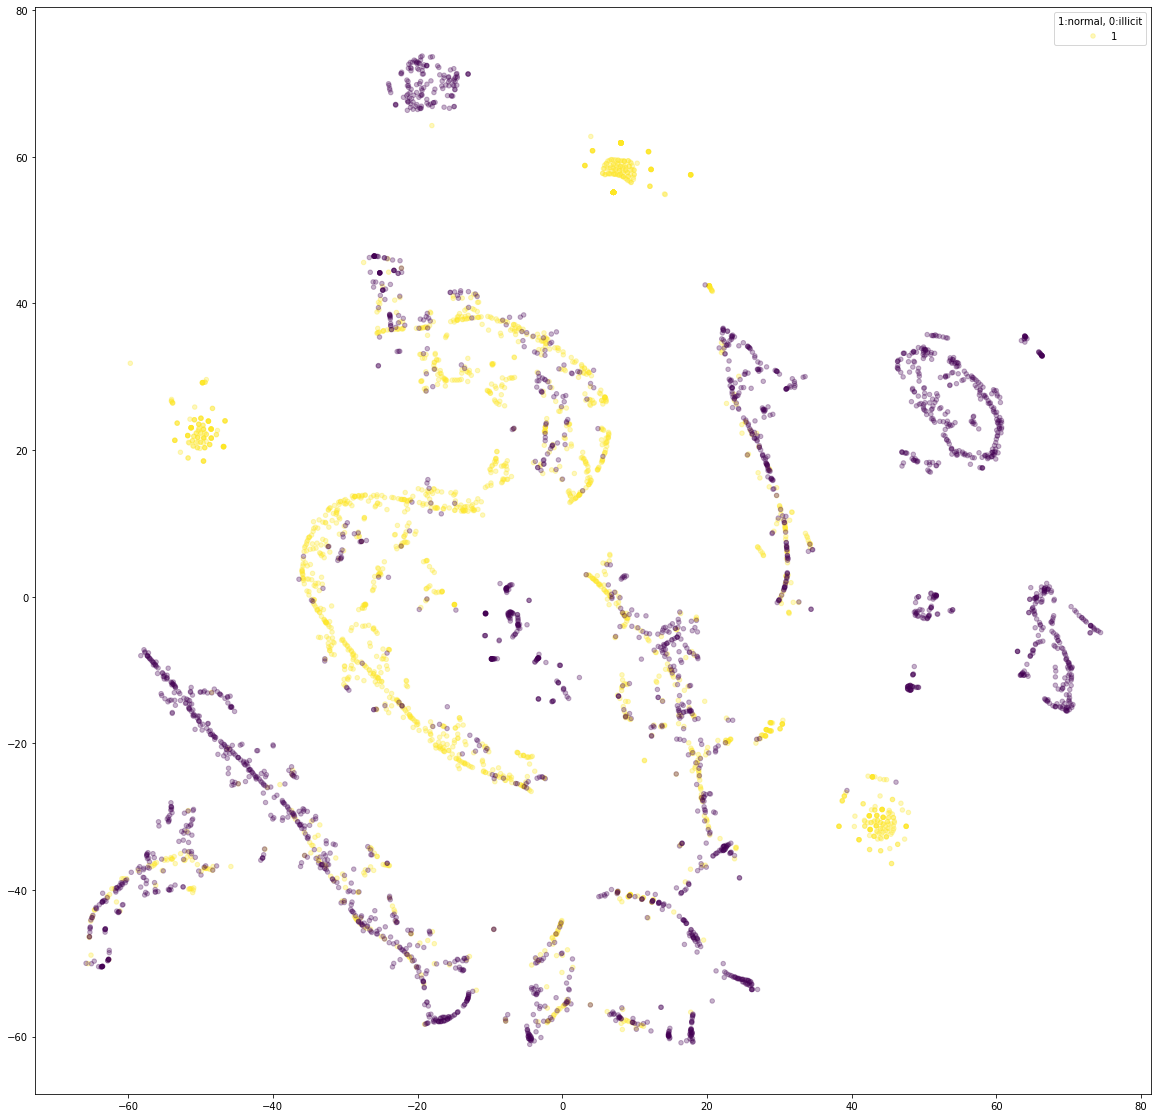

In [336]:
from sklearn.manifold import TSNE

eth_data = eth[['FLAG',
 'Avg_min_between_sent_tnx', 
 'Avg_min_between_received_tnx',
 'Time_Diff_between_first_and_last_(Mins)',
 'Sent_tnx',
 'Received_Tnx',
 'Number_of_Created_Contracts',
 'Unique_Received_From_Addresses',
 'Unique_Sent_To_Addresses',
 'min_value_received',
 'max_value_received',
 'avg_val_received',
 'min_val_sent',
 'max_val_sent',
 'avg_val_sent',
 'min_value_sent_to_contract',
 'max_val_sent_to_contract',
 'avg_value_sent_to_contract',
 'total_transactions_(including_tnx_to_create_contract)',
 'total_Ether_sent',
 'total_ether_received',
 'total_ether_sent_contracts',
 'total_ether_balance',
 'Total_ERC20_tnxs',
 'ERC20_total_Ether_received',
 'ERC20_total_ether_sent',
 'ERC20_total_Ether_sent_contract',
 'ERC20_uniq_sent_addr',
 'ERC20_uniq_rec_addr',
 'ERC20_uniq_sent_addr.1',
 'ERC20_uniq_rec_contract_addr',
 'ERC20_avg_time_between_sent_tnx',
 'ERC20_avg_time_between_rec_tnx',
 'ERC20_avg_time_between_rec_2_tnx',
 'ERC20_avg_time_between_contract_tnx',
 'ERC20_min_val_rec',
 'ERC20_max_val_rec',
 'ERC20_avg_val_rec',
 'ERC20_min_val_sent',
 'ERC20_max_val_sent',
 'ERC20_avg_val_sent',
 'ERC20_min_val_sent_contract',
 'ERC20_max_val_sent_contract',
 'ERC20_avg_val_sent_contract',
 'ERC20_uniq_sent_token_name']].copy()

eth.replace(np.nan,0)
eth_flags = eth_data['FLAG'].tolist()
eth_flags = list(eth_flags)
d = eth_data
t = eth_flags
n_components = 2
tsne = TSNE(n_components, perplexity=30, random_state=0, learning_rate='auto')
tsne_eth_fitted = tsne.fit_transform(d)

x = tsne_eth_fitted[:,0]
y = tsne_eth_fitted[:,1]
plt.figure(figsize= (20,20))
plt.scatter(x,y, c=t, cmap='viridis', s=20, alpha=0.3, label=t)
plt.legend(t, title='1:normal, 0:illicit')
